In [ ]:
# Analyse arXiv data

# Make use of arXiv api to do simple visualisations:

## 1. count how many publications with word novel in title (abstract) appears each day (month, or even year) and plot it
## 2. Compare with a word revisit. How often do these two appear together?
## 3. make histogram of lengths (amount of words) of abstracts from every paper where your supervisor is one of authors
# Advice:
# search for information about feedparser.parse, it may be useful

In [13]:
# Import modules
import urllib.request
import feedparser
import matplotlib.pyplot as plt
import numpy as np

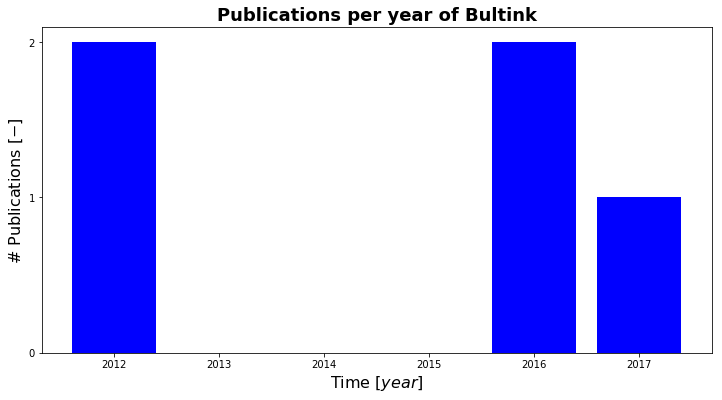

In [2]:
# name = 'Vandersypen'
name = 'Bultink'
# name =

url = 'http://export.arxiv.org/api/query?search_query=au:' + name + '&start=0&max_results=100'
parsed = feedparser.parse(url)

# Extract and analyze the data
year_dict = {}
for ii in range(len(parsed['entries'])):
    year = parsed['entries'][ii]['published'][:4]
    year_dict[year] = year_dict.get(year, 0) + 1

x1 = (sorted(year_dict))
x = [int(i) for i in x1]
x2 = [i for i in range(x[0],x[-1]+1)]
y = [year_dict[i] for i in x1]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(x, y, color='b')
ax.set_xticks(x2)
ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$year$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title('Publications per year of ' + name, fontsize = 18, fontweight = 'bold')
plt.show()











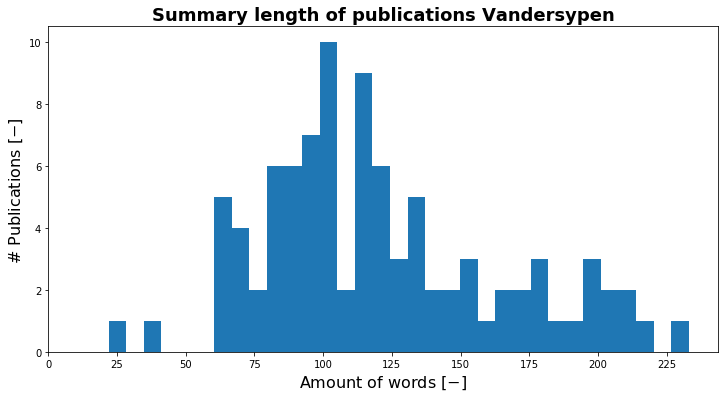

In [3]:
# Define name of person that you want to analyze publications from
name = 'Vandersypen'

# Get the proper publications from arxiv
url = 'http://export.arxiv.org/api/query?search_query=au:' + name + '&start=0&max_results=100'
parsed = feedparser.parse(url)


# Extract and analyze the data
length_list = []
for ii in range(len(parsed['entries'])):
    summary = parsed['entries'][ii]['summary']
    summary_list = summary.split()
    length_list.append(len(summary_list))

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
plt.hist(length_list, 33)
ax.set_xticks(range(0, max(length_list), 25))
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Amount of words [$-$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title('Summary length of publications ' + name, fontsize = 18, fontweight = 'bold')
plt.show()

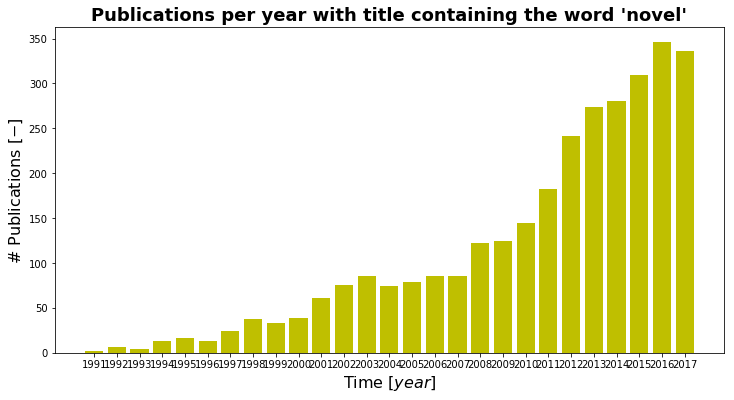

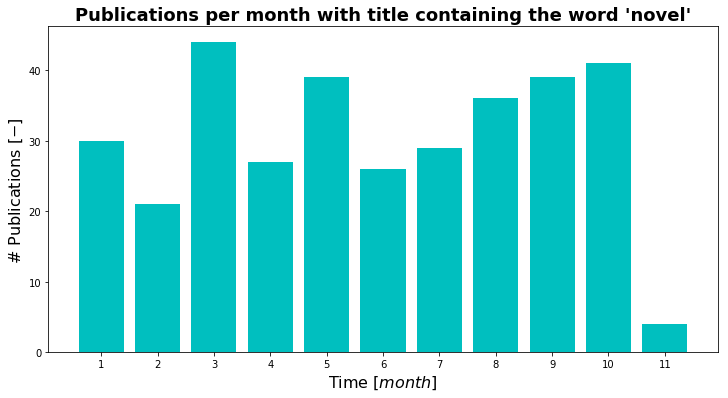

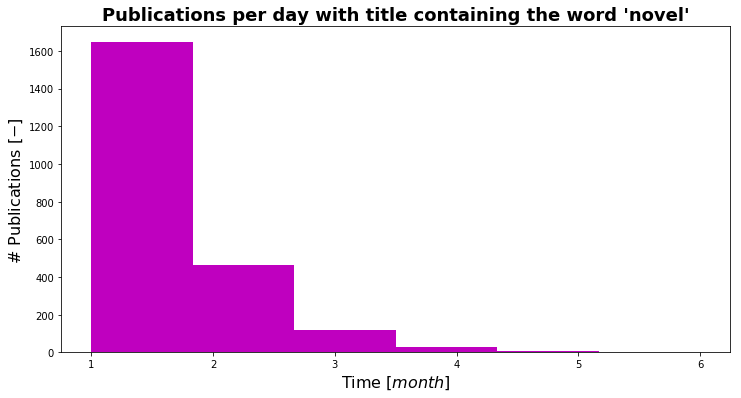

In [4]:
word = 'novel'

#Get the proper publications from arxiv
# url = 'http://export.arxiv.org/api/query?search_query=ti:' + word + '&start=0&max_results=3300&sortBy=lastUpdatedDate&sortOrder=descending'
# parsed_novel = feedparser.parse(url)

year_dict = {}
month_dict_2017 = {}
day_dict = {}
for ii in range(len(parsed_novel['entries'])):
    year = parsed_novel['entries'][ii]['published_parsed'][0]
    month = parsed_novel['entries'][ii]['published_parsed'][1]
    day = parsed_novel['entries'][ii]['published_parsed'][2]
    # Do year statistics
    year_dict[year] = year_dict.get(year, 0) + 1
    day_dict[parsed_novel['entries'][ii]['published'][:10]] = day_dict.get(parsed_novel['entries'][ii]['published'][:10], 0) +1
    
    if year == 2017:
        month_dict_2017[month] = month_dict_2017.get(month, 0) + 1
        
    
## Plot year data    
x_novel = [int(i) for i in sorted(year_dict)]
x2_novel = [i for i in range(x_novel[0],x_novel[-1]+1)]
y_novel = [year_dict[i] for i in sorted(year_dict)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(x_novel, y_novel, color='y')
ax.set_xticks(x2_novel)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$year$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per year with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()


## Plot month data
m_x_novel = [int(i) for i in sorted(month_dict_2017)]
m_x2_novel = [i for i in range(m_x_novel[0],m_x_novel[-1]+1)]
m_y_novel = [month_dict_2017[i] for i in sorted(month_dict_2017)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(m_x_novel, m_y_novel, color='c')
ax.set_xticks(m_x2_novel)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per month with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()



## Plot day data
d_y_novel = [day_dict[i] for i in sorted(day_dict)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.hist(d_y_novel, 6, color = 'm')
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per day with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()



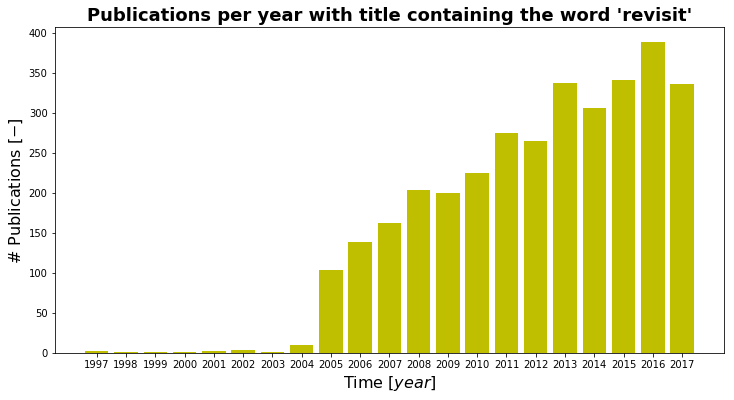

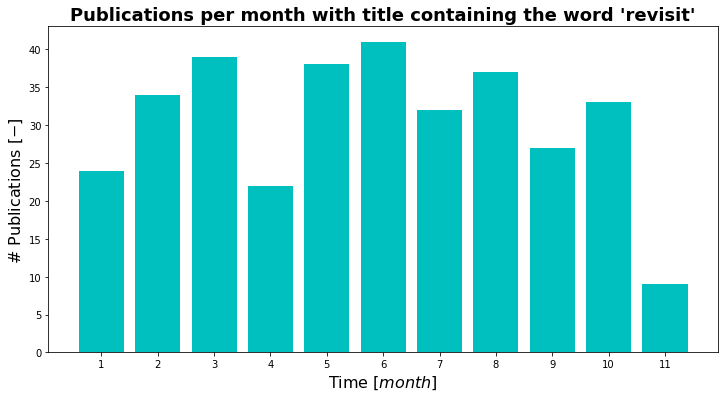

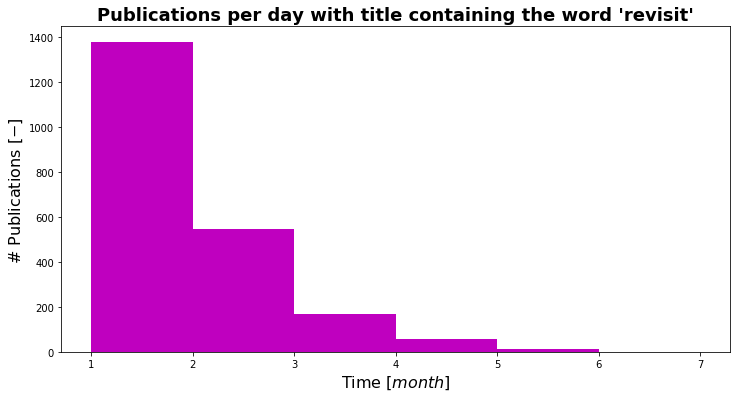

In [5]:
word = 'revisit'

#Get the proper publications from arxiv
# url = 'http://export.arxiv.org/api/query?search_query=ti:' + word + '&start=0&max_results=3300&sortBy=lastUpdatedDate&sortOrder=descending'
# parsed_revisit = feedparser.parse(url)

year_dict = {}
month_dict_2017 = {}
day_dict = {}
for ii in range(len(parsed_revisit['entries'])):
    year = parsed_revisit['entries'][ii]['published_parsed'][0]
    month = parsed_revisit['entries'][ii]['published_parsed'][1]
    day = parsed_revisit['entries'][ii]['published_parsed'][2]
    # Do year statistics
    year_dict[year] = year_dict.get(year, 0) + 1
    day_dict[parsed_revisit['entries'][ii]['published'][:10]] = day_dict.get(parsed_revisit['entries'][ii]['published'][:10], 0) +1
    
    if year == 2017:
        month_dict_2017[month] = month_dict_2017.get(month, 0) + 1
        
    
## Plot year data    
x_revisit = [int(i) for i in sorted(year_dict)]
x2_revisit = [i for i in range(x_revisit[0],x_revisit[-1]+1)]
y_revisit = [year_dict[i] for i in sorted(year_dict)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(x_revisit, y_revisit, color='y')
ax.set_xticks(x2_revisit)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$year$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per year with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()


## Plot month data
m_x_revisit = [int(i) for i in sorted(month_dict_2017)]
m_x2_revisit = [i for i in range(m_x_revisit[0],m_x_revisit[-1]+1)]
m_y_revisit = [month_dict_2017[i] for i in sorted(month_dict_2017)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(m_x_revisit, m_y_revisit, color='c')
ax.set_xticks(m_x2_revisit)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per month with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()



## Plot day data
d_y_revisit = [day_dict[i] for i in sorted(day_dict)]

# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.hist(d_y_revisit, 6, color = 'm')
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per day with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()

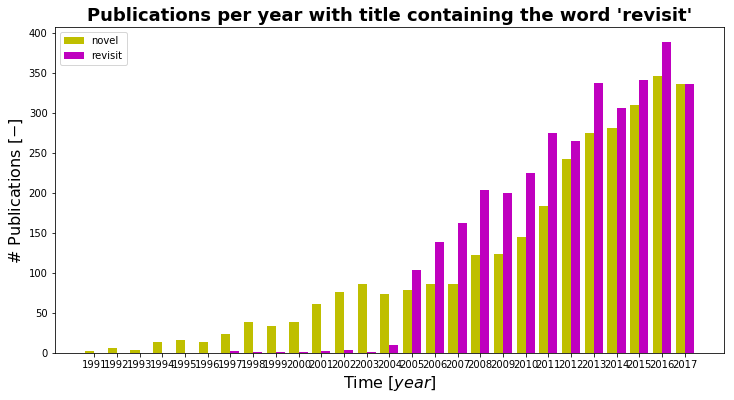

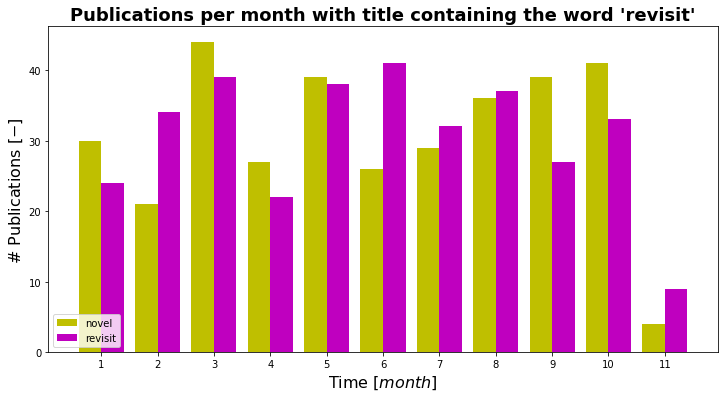

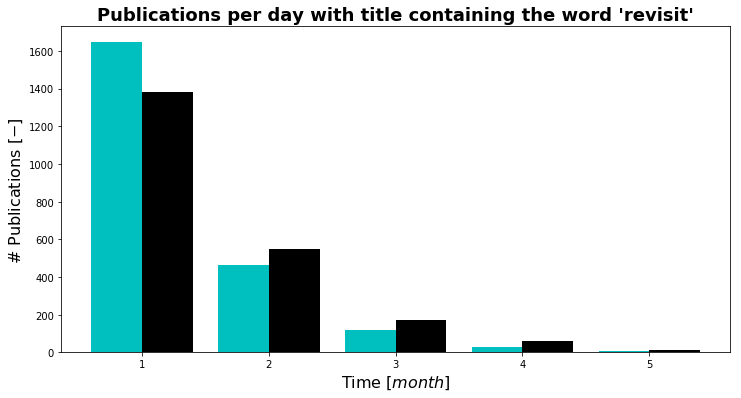

In [33]:
x_novel = np.array(x_novel)
x_revisit = np.array(x_revisit)
# Make the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(x_novel-0.2, y_novel, width = 0.4, color='y', label = 'novel')
ax.bar(x_revisit+0.2, y_revisit, width = 0.4, color = 'm', label = 'revisit')
ax.set_xticks(x2_novel)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$year$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per year with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.legend(loc = 2)
plt.show()

m_x_novel = np.array(m_x_novel)
m_x_revisit = np.array(m_x_revisit)
## Plot month data
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(m_x_novel-0.2, m_y_novel, width = 0.4, color='y', label = 'novel')
ax.bar(m_x_revisit+0.2, m_y_revisit, width = 0.4, color='m', label = 'revisit')
ax.set_xticks(m_x2_novel)
# ax.set_yticks(range(0,max(y)+1))
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per month with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.legend(loc = 3)
plt.show()


d_y_novel_new = []
for i in range(1,6):
    d_y_novel_new.append(d_y_novel.count(i))
d_y_revisit_new = []
for i in range(1,6):
    d_y_revisit_new.append(d_y_revisit.count(i))
d_x_novel_new = np.arange(1,6)
d_x_revisit_new = np.arange(1,6)

# Plot day data
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111)
ax.bar(d_x_novel_new-0.2, d_y_novel_new, width = 0.4, color = 'c')
ax.bar(d_x_revisit_new+0.2, d_y_revisit_new, width = 0.4, color = 'k')
ax.set_xlabel('Time [$month$]', fontsize = 16)
ax.set_ylabel('# Publications [$-$]', fontsize = 16)
ax.set_title("Publications per day with title containing the word '" + word +"'", fontsize = 18, fontweight = 'bold')
plt.show()